In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Create a new directory in the specified path
!mkdir -p /content/drive/MyDrive/GuidingRobot/data

# Unzip the file into the newly created directory
!unzip /content/drive/MyDrive/GuidingRobot/processed_data.zip -d /content/drive/MyDrive/GuidingRobot/data


In [ ]:
import pandas as pd
import glob

# Replace the path with the actual path to your CSV files
path = '/content/drive/MyDrive/GuidingRobot/data/processed_data/game_and_map_data_relative_positions'  # Example path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Concatenate all data into one DataFrame
frame = pd.concat(li, axis=0, ignore_index=True)


In [ ]:
import os

# Define the path to the new folder where you want to save the DataFrame
new_folder_path = '/content/drive/MyDrive/GuidingRobot/behavior_cloning_data_relative'

# Create the new folder if it does not exist
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

# Define the path including the name of the new CSV file you want to create
csv_file_path = os.path.join(new_folder_path, 'game_and_map_data_relative_positions.csv')

# Save the DataFrame as a CSV file in the new folder
frame.to_csv(csv_file_path, index=False)

print(f'DataFrame saved to {csv_file_path}')


DataFrame saved to /content/drive/MyDrive/GuidingRobot/behavior_cloning_data_relative/game_and_map_data_relative_positions.csv


#RUN FROM HERE

In [ ]:
import pandas as pd

# Load the dataset
csv_file_path = '/content/drive/MyDrive/GuidingRobot/behavior_cloning_data_relative/game_and_map_data_relative_positions.csv'
df = pd.read_csv(csv_file_path)# Assuming 'df' is your DataFrame




In [ ]:
def split_tuple_columns(df, column_name):
    # First, ensure the column is treated as a string, then split it more robustly
    df[column_name] = df[column_name].astype(str)
    split_columns = df[column_name].str.strip('()').str.split(',', expand=True)

    # Convert split columns to float, handling spaces that may follow the comma
    df[column_name + '_x'] = pd.to_numeric(split_columns[0], errors='coerce')
    df[column_name + '_y'] = pd.to_numeric(split_columns[1].str.strip(), errors='coerce') # Remove potential leading spaces

    return df.drop(column_name, axis=1)

# List of tuple columns to process
tuple_columns = [
    'P1_to_P2_relative_position',
    'P1_to_obs_1_relative_position',
    'P1_to_obs_2_relative_position',
    'P1_to_obs_3_relative_position',
    'P1_to_obs_4_relative_position',
    'P1_to_obs_5_relative_position',
    'P2_to_obs_1_relative_position',
    'P2_to_obs_2_relative_position',
    'P2_to_obs_3_relative_position',
    'P2_to_obs_4_relative_position',
    'P2_to_obs_5_relative_position',
    'P1_to_goal_relative_position',
    'P2_to_goal_relative_position'
]

# Process each tuple column
for col in tuple_columns:
    df = split_tuple_columns(df, col)

# Check the dtypes to confirm the conversion
print(df.dtypes)

P1_action                            int64
P2_action                            int64
reward                               int64
timestamp_milliseconds               int64
P1_to_P2_relative_position_x         int64
P1_to_P2_relative_position_y         int64
P1_to_obs_1_relative_position_x    float64
P1_to_obs_1_relative_position_y    float64
P1_to_obs_2_relative_position_x    float64
P1_to_obs_2_relative_position_y    float64
P1_to_obs_3_relative_position_x    float64
P1_to_obs_3_relative_position_y    float64
P1_to_obs_4_relative_position_x    float64
P1_to_obs_4_relative_position_y    float64
P1_to_obs_5_relative_position_x    float64
P1_to_obs_5_relative_position_y    float64
P2_to_obs_1_relative_position_x    float64
P2_to_obs_1_relative_position_y    float64
P2_to_obs_2_relative_position_x    float64
P2_to_obs_2_relative_position_y    float64
P2_to_obs_3_relative_position_x    float64
P2_to_obs_3_relative_position_y    float64
P2_to_obs_4_relative_position_x    float64
P2_to_obs_4

##Preprocess

In [ ]:
# Assuming P1_Direction is the target and all other columns are features
X = df.drop(['P1_action', 'P2_action', 'timestamp_milliseconds', 'reward'], axis=1)
y = df['P1_action']


##display correlation of features

In [ ]:
pip install seaborn


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlations of all features with 'P1_Direction'
p1_direction_correlations = correlation_matrix['P1_action'].sort_values(ascending=False)

# Display the correlation values
print(p1_direction_correlations)

P1_action                          1.000000
P1_to_P2_relative_position_y       0.132036
P2_action                          0.115320
P1_to_P2_relative_position_x       0.105441
timestamp_milliseconds             0.072340
P1_to_obs_5_relative_position_y    0.046685
P1_to_obs_4_relative_position_y    0.011327
P1_to_obs_3_relative_position_y    0.008528
P2_to_obs_5_relative_position_y    0.007661
P2_to_obs_3_relative_position_y    0.002308
P2_to_obs_4_relative_position_y   -0.003307
P2_to_obs_5_relative_position_x   -0.004481
P1_to_obs_1_relative_position_x   -0.005563
P1_to_goal_relative_position_y    -0.008904
P1_to_obs_2_relative_position_x   -0.014063
P2_to_obs_3_relative_position_x   -0.016087
P2_to_obs_1_relative_position_y   -0.016671
P1_to_obs_1_relative_position_y   -0.017438
reward                            -0.018696
P1_to_obs_3_relative_position_x   -0.025030
P2_to_goal_relative_position_y    -0.028679
P1_to_obs_5_relative_position_x   -0.028981
P1_to_obs_4_relative_position_x 

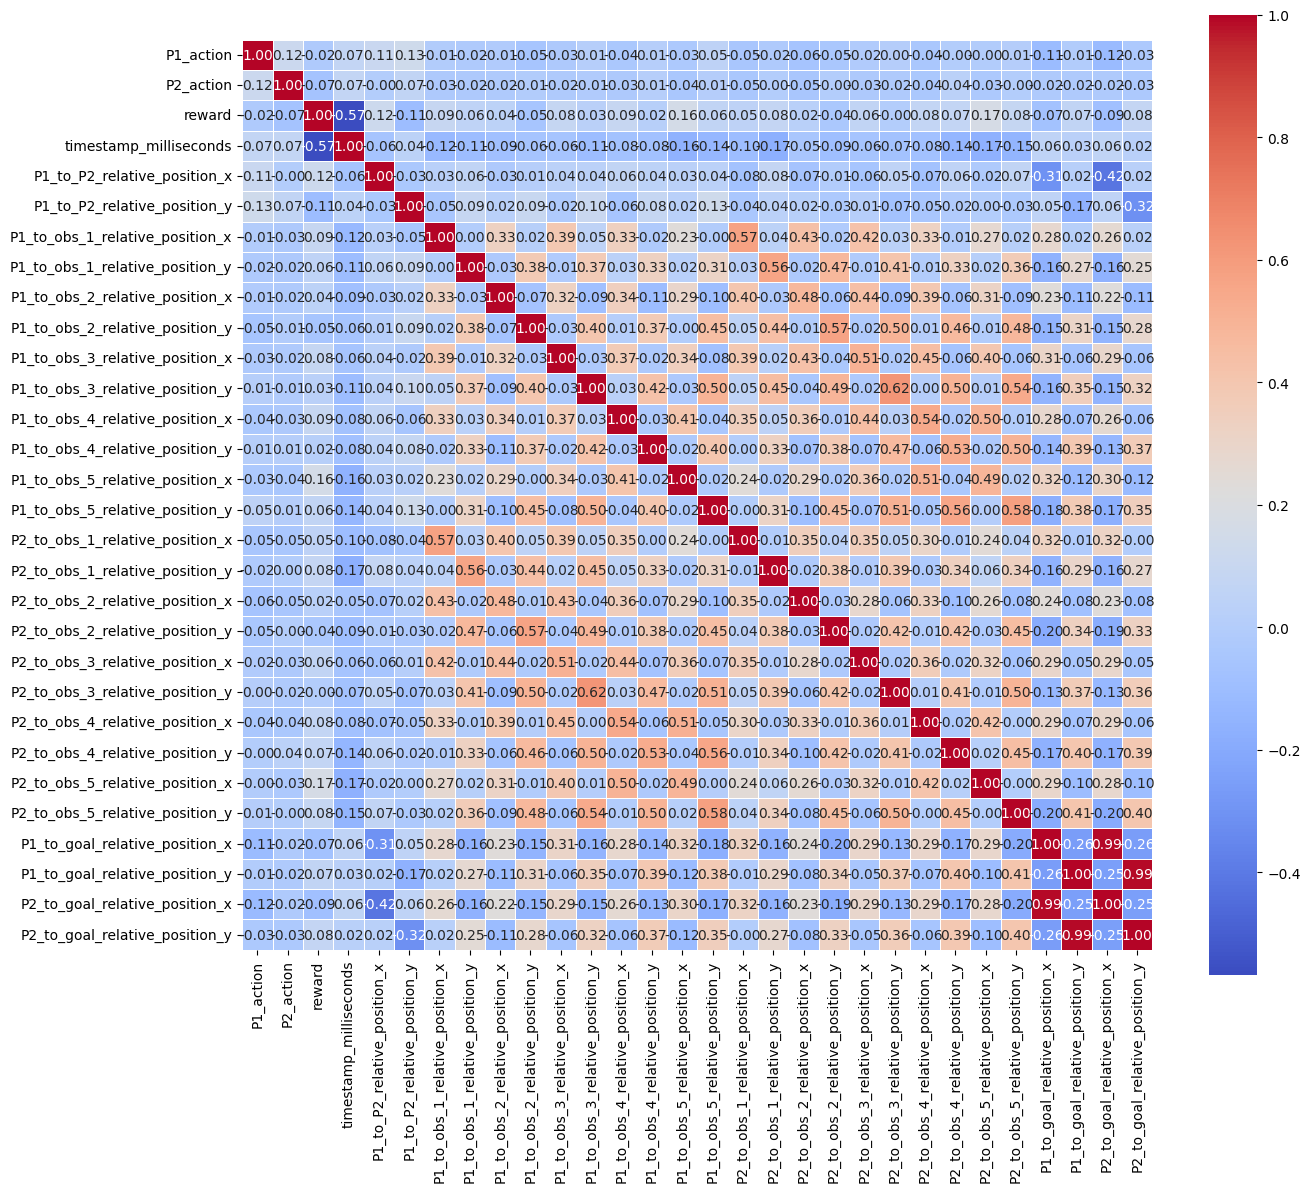

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

# Adjust layout for better readability
plt.tight_layout()

# Show plot
plt.show()


##split into train test val

 60% train, 20% validation, and 20% test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2



##convert df to numpy array then tensor

In [ ]:

import torch
X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_val_tensor = torch.tensor(y_val.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)


##Create Data Loader

In [ ]:
# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 64  # You can adjust the batch size

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


##create model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


class BCAgent(nn.Module):
    def __init__(self):
        super(BCAgent, self).__init__()
        self.fc1 = nn.Linear(26, 1024)  # 26 features input
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 5)     # 5 classes output

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)  # No activation, as we'll use nn.CrossEntropyLoss
        return x


In [ ]:
''''
**OLD**

model = Sequential([
    Dense(1024, activation='relu', input_shape=(26,), ),
    Dense(512, activation='relu', ),
    Dense(128, activation='relu', ),
    Dense(64, activation='relu', ),
    Dense(32, activation='relu', ),
    # Update the Dense layer for output according to your classification/regression needs
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''

In [ ]:
'''
model = Sequential([
    Dense(512, activation='relu', input_shape=(26,), ),

    Dense(128, activation='relu', ),

    Dense(32, activation='relu', ),
    # Update the Dense layer for output according to your classification/regression needs
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
##RUN ON WAND B NAME-SOFT MEDOW
'''

In [ ]:

''''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Assuming X_train.shape[1] is 126, replace it with 126 directly if you're not sure
model = Sequential([
    Dense(1024, activation='relu', input_shape=(26,), ),
    Dense(512, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(128, activation='relu', ),
    Dense(64, activation='relu', ),
    Dense(32, activation='relu', ),
    # Update the Dense layer for output according to your classification/regression needs
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
###increasing depth deterioraes performance

##RUN ON WAND B NAME-GIDDY BUTTERFLY

''''

##train

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint, WandbEvalCallback


wandb.login()



<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import wandb
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch

# EarlyStopping class to stop the training when a monitored metric has stopped improving.
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = np.Inf
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                print('Early stopping')
                self.early_stop = True


In [ ]:
def compute_advantage(rewards, values, next_values, dones, gamma):
    td_target = rewards + gamma * next_values * (1 - dones)
    advantage = td_target - values
    return advantage

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import wandb

# Assuming BCAgent and ValueNetwork classes are defined above

# Initialize models
bc_model = BCAgent()
value_model = ValueNetwork()

# Define optimizers and loss function for BC model
bc_optimizer = optim.Adam(bc_model.parameters(), lr=config.learning_rate)
bc_criterion = nn.CrossEntropyLoss()  # Assuming a classification task

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bc_model.to(device)
value_model.to(device)

# Initialize Weights & Biases
wandb.init(project='GRProject Pytorch1', config={
    "learning_rate": 0.001,
    "epochs": 100,
    "batch_size": 64,
    "gamma": 0.99,  # Discount factor for advantage calculation
    # Add any other hyperparameters you might have
})
config = wandb.config

early_stopping = EarlyStopping(patience=10, min_delta=0.001)

for epoch in range(config.epochs):
    bc_model.train()
    value_model.train()
    running_bc_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, actions, rewards, next_inputs, dones in train_loader:
        inputs, actions, rewards, next_inputs, dones = [
            x.to(device) for x in [inputs, actions, rewards, next_inputs, dones]
        ]

        # Behavior cloning model predictions and loss
        bc_logits = bc_model(inputs)
        bc_loss = bc_criterion(bc_logits, actions)

        # Value network predictions
        state_values = value_model(inputs).squeeze()
        next_state_values = value_model(next_inputs).squeeze().detach()

        # Compute advantage and adjust BC loss
        advantage = compute_advantage(rewards, state_values, next_state_values, dones, config.gamma)
        weighted_bc_loss = (bc_loss * advantage.detach()).mean()

        # Update BC model
        bc_optimizer.zero_grad()
        weighted_bc_loss.backward()
        bc_optimizer.step()

        running_bc_loss += weighted_bc_loss.item() * inputs.size(0)

        _, predicted = torch.max(bc_logits.data, 1)
        total_predictions += actions.size(0)
        correct_predictions += (predicted == actions).sum().item()

    epoch_bc_loss = running_bc_loss / total_predictions
    epoch_bc_accuracy = (correct_predictions / total_predictions) * 100

    # Validation phase
    bc_model.eval()
    value_model.eval()  # If the value model is used during validation
    val_loss = 0.0
    correct_val_predictions = 0
    total_val_predictions = 0

    with torch.no_grad():
        for inputs, actions, rewards, next_inputs, dones in val_loader:
            inputs, actions, rewards, next_inputs, dones = [
                x.to(device) for x in [inputs, actions, rewards, next_inputs, dones]
            ]

            bc_logits = bc_model(inputs)
            bc_loss = bc_criterion(bc_logits, actions)
            val_loss += bc_loss.item() * inputs.size(0)

            _, predicted = torch.max(bc_logits.data, 1)
            total_val_predictions += actions.size(0)
            correct_val_predictions += (predicted == actions).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = (correct_val_predictions / total_val_predictions) * 100

    # Log metrics to WandB
    wandb.log({
        "epoch": epoch + 1,
        "Train_loss": epoch_bc_loss,
        "Train_accuracy": epoch_bc_accuracy,
        "Val_loss": val_loss,
        "Val_accuracy": val_accuracy
    })

    # Early stopping
    early_stopping(epoch_bc_loss)
    if early_stopping.early_stop:
        print(f"Stopped early at epoch {epoch + 1}")
        break

# Close the WandB run
wandb.finish()



EarlyStopping counter: 1 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10


##Inference

In [1]:
bc_model.eval()  # Set the BC model to evaluation mode
test_loss = 0.0
correct_predictions = 0
total_predictions = 0

# No gradients needed when we're only doing inference
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Get the output from the behavior cloning model
        outputs = bc_model(inputs)

        # Compute the loss
        loss = bc_criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)  # Accumulate the batch loss

        # Calculate predictions for accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

# Calculate the average loss and accuracy over the entire test set
test_loss /= len(test_loader.dataset)
test_accuracy = (correct_predictions / total_predictions) * 100

# Log the test metrics to WandB
wandb.log({'test_loss': test_loss, 'test_accuracy': test_accuracy})


NameError: name 'model' is not defined